<a href="https://colab.research.google.com/github/Ziyi-star/Bachelor-Project/blob/main/notebooks/handlebar/LSTM/Lstm__Handlebar_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# For Vscode
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
RANDOM_SEED = 42

import sys
sys.path.append('../../../')   # Add parent directory to Python path
from utils.Plots import *

df = pd.read_csv('../../../data/handlebar/processed_segments_overlap_50.csv')
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,8.762772,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295


In [ ]:
# For Colab
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
RANDOM_SEED = 42


import os
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Project/data/processed_segments_overlap_50.csv')
# # 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295


In [30]:
#df.drop('Unnamed: 0', axis=1, inplace=True)


In [4]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'],
                                                                    test_size=0.2,
                                                                    random_state=RANDOM_SEED)

In [5]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])
train_data_scaled.shape


(7453, 100)

In [6]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
train_data_scaled_df.head()

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,0.099842,0.367573,-0.760735,-0.741110,-0.643996,1.478013,1.460586,0.377973,-1.298170,-2.613329,...,-0.582613,-1.255213,-0.701392,0.471675,0.901263,0.321502,-0.614684,0.125772,0.418495,0.0
1,0.287473,-0.438213,-0.262225,-0.632199,0.733360,0.425447,0.325230,0.411709,-0.423649,0.776224,...,-0.527615,0.937265,1.770801,1.560933,-0.131658,-1.879847,-1.206281,-0.206123,0.528233,0.0
2,-0.889006,-0.240796,0.149586,0.175351,-0.117633,-0.764769,-1.020560,-0.874950,-0.199176,0.381914,...,-0.216459,-0.520273,-0.635812,-0.342957,0.028676,1.100680,0.824921,-0.265390,-0.858003,0.0
3,1.466225,1.286168,-0.577708,-1.422806,-0.696546,0.911753,0.885006,-0.045683,-1.041988,-0.455054,...,-3.053017,1.231087,2.014817,-2.399102,-6.967440,-6.682476,-0.651555,0.426846,-4.315520,0.0
4,-0.690028,-0.464805,1.045457,0.830425,0.002728,-1.053255,-0.338514,0.800059,0.798846,0.158502,...,-0.794318,-1.508160,-1.290846,0.791125,2.443709,1.781598,-0.239281,-0.758489,-0.189899,0.0


In [7]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]

In [8]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")
print(normal_train_data_scaled.shape, abnormal_train_data_scaled.shape)
print(normal_test_data_scaled.shape, abnormal_test_data_scaled.shape)

(7178, 100) (275, 100)
(1796, 100) (68, 100)


In [9]:
# Initialize and train One-Class SVM, Using only normal data for training
ocsvm = OneClassSVM(kernel='rbf', nu=0.001, gamma='scale')
ocsvm.fit(normal_train_data_scaled)

OneClassSVM(nu=0.001)

In [10]:
import joblib

# Save the model
joblib.dump(ocsvm, '../../../models/ocsvm_handlebar.joblib')

['../../../models/ocsvm_handlebar.joblib']

In [11]:
# Using joblib
loaded_model = joblib.load('../../../models/ocsvm_handlebar.joblib')

In [12]:
# Predict on test dataneClassSVM returns 1 for inliers (normal) and -1 for outliers (abnormal)
# Note: O
# We'll convert these to 0 for normal and 1 for abnormal to match our original labels
normal_pred = loaded_model.predict(normal_test_data_scaled)
abnormal_pred = loaded_model.predict(abnormal_test_data_scaled)
print(normal_pred)
print(abnormal_pred)

[ 1  1  1 ... -1  1  1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [44]:
# Convert predictions from 1/-1 to 0/1
# np.where(condition, x, y), x if condition is True, else y
normal_pred = np.where(normal_pred == 1, 0, 1)
abnormal_pred = np.where(abnormal_pred == -1, 1, 0)
print(normal_pred)
print(abnormal_pred)

[0 0 0 ... 1 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [45]:
# Combine predictions and create true labels
y_pred = np.concatenate([normal_pred, abnormal_pred])
y_true = np.concatenate([np.zeros(len(normal_test_data_scaled)), 
                        np.ones(len(abnormal_test_data_scaled))])

In [47]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1796
         1.0       0.33      1.00      0.49        68

    accuracy                           0.92      1864
   macro avg       0.66      0.96      0.73      1864
weighted avg       0.98      0.92      0.94      1864



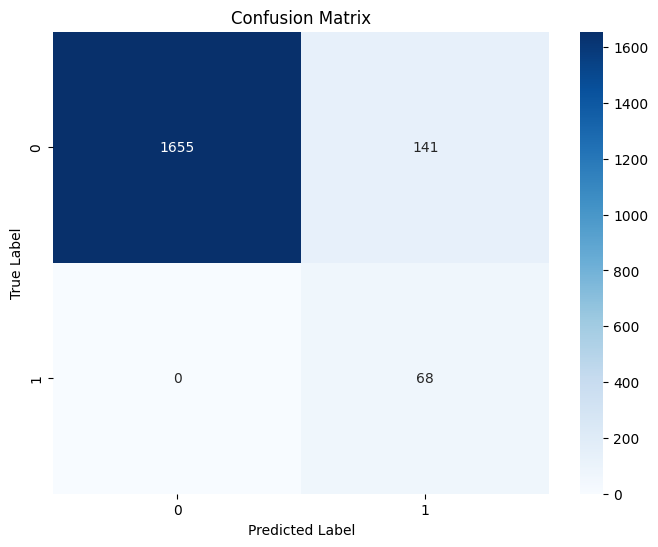

In [48]:
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Custom scorer for OneClassSVM
def custom_scorer(estimator, X, y_true):
    y_pred = estimator.predict(X)
    y_pred = np.where(y_pred == 1, 0, 1)  # Convert to match labels
    return f1_score(y_true, y_pred)

# Parameter grid
param_grid = {
    'kernel': ['rbf', 'linear', 'sigmoid','poly'],
    'nu': [0.001, 0.005, 0.01],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
}

# Create train and validation data (with labels to score)
X_train = normal_train_data_scaled
X_val = np.vstack([normal_test_data_scaled[:50], abnormal_test_data_scaled[:50]])  # Sample for faster search
y_val = np.concatenate([np.zeros(50), np.ones(50)])

In [40]:
# GridSearchCV
grid = GridSearchCV(
    OneClassSVM(), 
    param_grid, 
    scoring=make_scorer(custom_scorer, greater_is_better=True), 
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid.fit(X_train, np.zeros(len(X_train)))  # Dummy labels for training

Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\liuzi\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=OneClassSVM(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
                         'nu': [0.001, 0.005, 0.01]},
             scoring=make_scorer(custom_scorer, response_method='predict'),
             verbose=1)

In [41]:
# Best parameters
print(f"Best parameters: {grid.best_params_}")
best_ocsvm = grid.best_estimator_

Best parameters: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.001}
